# Homework  4 and 5

### Submit one notebook per project group via Slack/email.

1. Pick your dataset for approval by me by Friday 11:59pm PST. Not submitting for approval will result in no credit for this HW.


2. Find the **most similar sentences or documents in your dataset using word count, TF-IDF, and word-embeddings** as your vectorization techniques. If the computation is slow, **you may subsample** for only a few thousand rows. (2 pts)

### Submit one notebook per project group via Slack/email. Pick ONE of the TWO tasks below to complete: (we chose A)


A. Build **an unsupervised clustering model** to cluster and visualize the text in your dataset. Your implementation must include:
- a **dimensionality reduction** technique (PCA)
- a **clustering algorithm** (k-NN, k-means, Gaussian mixture models, etc.) - you can find an example of how to use a clustering algorithm in the Glove and Clustering Jupyter notebook in week 7's folder.
- a discussion of which vectorization technique performs the best and why (GloVe, TF-IDF, word count, one-hot encoding, word2vec)


Answer for point 3 in A:

Word-embeddings (word2vec) works extremely well in comparison with the other vectorization methods, especially in our case of movie reviews: 

Comparing word embedding techniques to each of the methods:


**TF-IDF**
* Word embedding caries much more information then a tf-idf score. It's a multidimensional vector that captures the relationship of words with other words (semantic similarity), whereas TF-IDF is a sparse matrix that maps a word to a value (frequency, how important a word is to a document)

* The setback of word embedding is that it is more memory intensive and more difficult to apply.

**GloVe**
* GloVe is a count based model, where it learns the vectors by doing dimensionality reduction on the co-occurrence counts matrix so it basically counts how frequently a word appears in a context. Unlike word embeddings and word2vec, where they're predictive models and they're trained on the context of the word and similar words will have similar numerical representations.

**Word Count**
* Only gives the counts of the words and is usually replaced with TF-IDF scores within a dataset. 

**One Hot Encoding**
* Word embeddings captures more information about a word than just a one-hot representation of the word, since the it captures semantic similarity of that word to other words whereas the one hot encoding representation of the word is equidistant from all other words.


Practically, tf-idf is a simple scoring scheme and that is its main advantage, however, word embeddings are a better choice for most tasks where tf-idf is used. Moreover, it is particularly useful for when the task can benefit from the semantic similarity captured by word embeddings more than it would benefit from scores and that was proven during our analysis as well.


Import Modules

In [1]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from itertools import product

import en_core_web_md
import spacy
from scipy.spatial.distance import cosine
nlp = en_core_web_md.load()

Import Data

In [2]:
df = pd.read_csv('labeledTrainData.tsv', sep = '\t')
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


Subsample of 5000 reviews

In [3]:
df = df.sample(n = 2000)
df.head()

,id,sentiment,review
1023,4687_8,1,Lizzie Borden's Love Crimes is an important fi...
20077,5882_1,0,Not sure why this film was advertised as a wil...
8204,3294_9,1,This film opened to poor showings in the first...
19315,5177_8,1,I watched this last night after not having see...
581,3248_10,1,The plot is tight. The acting is flawless. The...


In [4]:
import nltk
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [5]:
def clean(x):
    
    s = ''
    for i in nltk.word_tokenize(x):
        if i not in ['movies','movie','film','Movies', 'movie', 'Film', 'People', 'people', 'ha', 'br', 'wa', 'really', 'watch', 'watching']:
            i = i.lower()
            i = lemmatizer.lemmatize(i)
            
            if i not in ['wa', 'ha','br']:
                s += i+ ' '

    return s.strip()
            
        

In [6]:
%%time
df['review'] = df['review'].apply(lambda x: clean(x)  )

Wall time: 14.9 s


### Find most similar sentences using word count

In [7]:
vectorizer = CountVectorizer(ngram_range=(1, 1), 
                             stop_words="english", 
                             max_features=500,token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b')
X = vectorizer.fit_transform(df['review'])

data = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names(), index = df['id'])
data.head()

,able,absolutely,act,acting,action,actor,actress,actual,actually,add,...,worst,worth,writer,writing,written,wrong,year,yes,young,zombie
id,,,,,,,,,,,,,,,,,,,,,
4687_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5882_1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3294_9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5177_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3248_10,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
cos_sim = cosine_similarity(X, X)

In [9]:
cos_sim_df = pd.DataFrame(cos_sim, columns = df['id'])
cos_sim_df.head()

id,4687_8,5882_1,3294_9,5177_8,3248_10,342_1,2866_9,11427_10,4883_1,3408_4,...,8151_10,10712_8,3951_2,10618_8,268_8,1611_10,861_2,1523_9,1069_10,1604_4
0,1.000000,0.109632,0.058148,0.032686,0.049029,0.027735,0.097163,0.043853,0.045596,0.035511,...,0.019612,0.023783,0.057831,0.133993,0.066617,0.108287,0.025751,0.110208,0.033389,0.128922
1,0.109632,1.000000,0.099449,0.074536,0.167705,0.031623,0.086164,0.000000,0.051988,0.040489,...,0.156525,0.054233,0.263752,0.224070,0.101274,0.209893,0.117444,0.104713,0.057104,0.160357
2,0.058148,0.099449,1.000000,0.098833,0.074125,0.000000,0.114252,0.066299,0.103402,0.134219,...,0.177900,0.179779,0.116577,0.202578,0.100716,0.180086,0.194662,0.097194,0.037860,0.106315
3,0.032686,0.074536,0.098833,1.000000,0.083333,0.047140,0.110096,0.000000,0.154997,0.150893,...,0.000000,0.080845,0.032765,0.258110,0.113228,0.110432,0.087538,0.124878,0.113501,0.099602
4,0.049029,0.167705,0.074125,0.083333,1.000000,0.141421,0.027524,0.111803,0.174371,0.045268,...,0.000000,0.242536,0.122868,0.113872,0.056614,0.193255,0.065653,0.046829,0.000000,0.179284


In [10]:
df_unstack = cos_sim_df.unstack()
sim_reviews = df_unstack.sort_values(kind = 'quicksort', ascending = False) 

In [11]:
# For some reason sampling for less than 1 did not get rid of identical reviews, so I used a number very close to 1
sim_reviews = sim_reviews[sim_reviews < 0.999999]
sim_reviews.drop_duplicates(keep = 'first', inplace = True)
sim_reviews

id            
10944_1   5       0.698430
10806_1   1342    0.671547
1020_10   1129    0.665536
5186_10   1798    0.655826
8171_8    1552    0.632599
6491_10   888     0.631620
9425_10   1540    0.630753
          1420    0.622425
1553_10   1381    0.618123
1518_8    620     0.617206
8894_10   1055    0.617032
7677_4    1798    0.611527
2615_2    1402    0.611274
11828_3   58      0.609952
4256_8    1674    0.609686
1078_8    68      0.608505
6495_10   118     0.608395
2903_9    1083    0.608219
6159_1    1342    0.604380
9082_10   1558    0.602652
10944_1   114     0.601835
10577_2   1798    0.600312
5406_4    1342    0.599037
7253_1    1406    0.597242
8169_4    1203    0.595893
11470_3   1772    0.595764
12122_7   1107    0.590351
7392_8    620     0.589768
8894_10   319     0.589768
10031_2   1735    0.589550
                    ...   
10299_9   1641    0.005047
6789_8    68      0.005029
6364_8    1641    0.005001
7491_1    1851    0.004956
          880     0.004912
2605_7    164

### Find most similar sentences using TF-IDF

In [12]:
vectorizer = TfidfVectorizer(ngram_range=(1, 1), 
                             stop_words="english", 
                             max_features=500,token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b')
X = vectorizer.fit_transform(df['review'])

data = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names(), index = df['id'])
data.head()

,able,absolutely,act,acting,action,actor,actress,actual,actually,add,...,worst,worth,writer,writing,written,wrong,year,yes,young,zombie
id,,,,,,,,,,,,,,,,,,,,,
4687_8,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.121662,0.0
5882_1,0.0,0.0,0.0,0.129508,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.175039,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
3294_9,0.0,0.0,0.0,0.000000,0.0,0.075247,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.074965,0.113385,0.000000,0.0
5177_8,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.181973,0.000000,0.000000,0.0
3248_10,0.0,0.0,0.0,0.300720,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


In [13]:
cos_sim = cosine_similarity(X, X)

In [14]:
cos_sim_df = pd.DataFrame(cos_sim, columns = df['id']) #removed index
cos_sim_df.head()

id,4687_8,5882_1,3294_9,5177_8,3248_10,342_1,2866_9,11427_10,4883_1,3408_4,...,8151_10,10712_8,3951_2,10618_8,268_8,1611_10,861_2,1523_9,1069_10,1604_4
0,1.000000,0.070706,0.039336,0.034892,0.045430,0.041372,0.072278,0.045976,0.024247,0.023320,...,0.026812,0.028354,0.028917,0.116403,0.058722,0.075023,0.024716,0.077896,0.030846,0.088839
1,0.070706,1.000000,0.057974,0.036464,0.118326,0.022866,0.052849,0.000000,0.025107,0.024713,...,0.108762,0.039689,0.189127,0.125234,0.056868,0.159346,0.060859,0.109754,0.017536,0.101797
2,0.039336,0.057974,1.000000,0.059572,0.021114,0.000000,0.086440,0.015579,0.043412,0.094582,...,0.163050,0.074839,0.061653,0.117614,0.035543,0.107003,0.094132,0.031973,0.014707,0.050912
3,0.034892,0.036464,0.059572,1.000000,0.054480,0.034911,0.061567,0.000000,0.158395,0.096739,...,0.000000,0.080692,0.011573,0.151781,0.052554,0.061716,0.053121,0.080786,0.092287,0.049880
4,0.045430,0.118326,0.021114,0.054480,1.000000,0.108997,0.007974,0.032750,0.104920,0.026355,...,0.000000,0.104681,0.084672,0.066745,0.018096,0.095004,0.022982,0.013295,0.000000,0.102891


In [15]:
df_unstack = cos_sim_df.unstack()
sim_reviews = df_unstack.sort_values(kind = 'quicksort', ascending = False)

In [16]:
# For some reason sampling for less than 1 did not get rid of identical reviews, so I used a number very close to 1
sim_reviews = sim_reviews[sim_reviews < 0.999999]
sim_reviews.drop_duplicates(keep = 'first', inplace = True)
sim_reviews

id            
1025_8    1798    0.716142
1020_10   810     0.705477
8340_1    503     0.702675
6491_10   888     0.693299
11893_10  1474    0.682987
2977_1    480     0.675886
2980_4    1037    0.668206
6701_9    1998    0.666546
6764_4    690     0.655308
1069_10   1332    0.653779
7839_4    1623    0.653068
1709_3    1037    0.648556
12125_8   979     0.645701
1020_10   32      0.638723
1102_8    1059    0.637220
3479_9    213     0.633386
1709_3    798     0.632315
7252_8    149     0.631110
11031_8   447     0.626296
1594_8    450     0.625793
2977_1    1726    0.625065
6495_10   118     0.618203
12122_7   1107    0.617812
1900_4    248     0.609313
8249_10   798     0.604689
1069_10   1129    0.601003
4154_1    1037    0.600520
5186_10   1129    0.598772
12122_7   717     0.591676
11066_1   1284    0.591088
                    ...   
7491_1    1780    0.001457
10376_7   1641    0.001442
7491_1    1058    0.001427
          1227    0.001424
          401     0.001421
          189

### Find most similar sentences using word embeddings

In [17]:
df.set_index(['id'], inplace = True)

In [18]:
# Found a code online to incorporate stopwords with spacy
# https://stackoverflow.com/questions/52807080/is-there-a-simple-way-to-tell-spacy-to-ignore-stop-words-when-using-similarity
from spacy.lang.en import STOP_WORDS
import numpy as np

def compute_similarity(vector1,vector2):
    
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))

In [19]:
a = product(df.index, repeat=2)

In [20]:
def vectorize(doc1):
    vector1 = np.zeros(300)
    #vector2 = np.zeros(300)
    for token in doc1:
        if (token.text not in STOP_WORDS):
            vector1 = vector1 + token.vector
    vector1 = np.divide(vector1, len(doc1))
    return vector1

In [21]:
%%time

x = {}

for i in df.index:
    x[i] = vectorize(nlp(df['review'].loc[i]))



Wall time: 3min 13s


In [22]:
%%time
similarity_tuples = []


for doc1, doc2 in product(df.index, repeat=2):
    similarity_tuples.append([doc1, doc2, compute_similarity(x[doc1], x[doc2])])

similarities = pd.DataFrame(similarity_tuples, columns=["review1","review2", "score"])

Wall time: 1min 23s


In [23]:
result = similarities[similarities["score"] < 0.999999].sort_values(
    by="score", ascending=False).drop_duplicates(
    subset="score", keep="first")

Note that all code taken above was sourced or adapted from Yu Chen's github

In [24]:
result.head()

,review1,review2,score
1609701,849_1,10019_8,0.986698
1502201,5289_3,9184_10,0.986623
2313225,11195_1,418_4,0.986563
3021225,4171_7,418_4,0.986452
1441701,5123_2,10019_8,0.985921


In [25]:
c = result.iloc[0].values

In [26]:
df.loc[c[0]].values

array([0,
       "one star . that 's all this documentary deserves . i have n't felt this disappointed in a , let alone a documentary , in quite some time. < / > < / > i 'm a big fan of the \\walking with ... \\ '' series , including it 's nigel marvin spin-off , for all their gleeful fun yet informative information . and although the subject of prehistoric man never interested me nearly a much a other prehistoric creature , the subject is still interesting and unique to explore . having seen all the other doc from the series , i figured i need to see this one a well , especially after seeing relatively good review in other places. < / > < / > well for those of you who put up a good review of this doc ... what were you thinking ? ! lol. < / > < / > though the information that they were able to get through interesting , the presentation failed in every other way possible . it had a terrible flow , incredibly unfocused in what it trying to say ( with information scrambled and sometimes o

In [27]:
df.loc[c[1]].values

array([1,
       "when it come to i can be pretty picky , and i 'll complain about anything and everything that is done wrong . while every it flaw , the night listener had an exceptionally low count. < / > < / > if you read the last review ( it hard , since half of it written in cap and it contained no actual information about the ) , you may have been led to believe that this not too well done . unfortunately , if you read more than 3 line into that same review , you discovered the poster 's reason for disdain : he/she doe not like the fact that the director is gay ( or that the production team smoke crack ... apparently ) . < / > < / > so , despite the fact that i have never written a review before , i thought this deserved one based on it merit , not the sexual orientation of it director . let 's go over a quick checklist first : 1 . great plot ? absolutely . i wo n't give a shred of it away , but the plot is highly compelling and definitely not what one would expect based on the c

In [28]:
x.keys()

dict_keys(['4687_8', '5882_1', '3294_9', '5177_8', '3248_10', '342_1', '2866_9', '11427_10', '4883_1', '3408_4', '8234_1', '7670_8', '11809_10', '5850_9', '11171_3', '8165_3', '2088_8', '1333_1', '10038_10', '7496_8', '3968_10', '4289_3', '9309_1', '1665_7', '6956_2', '7232_8', '12061_10', '9599_1', '96_1', '5623_10', '11423_8', '12080_8', '7677_4', '1413_7', '7406_9', '11561_4', '7155_8', '3179_8', '4392_3', '10041_10', '3260_3', '3030_9', '797_1', '9456_8', '8169_4', '6719_2', '7883_1', '340_3', '10266_1', '6868_3', '11564_4', '5571_10', '8911_4', '9122_1', '8715_10', '6240_10', '7168_4', '7970_10', '8894_10', '4185_3', '1972_1', '1191_9', '3333_4', '2411_9', '11572_8', '9796_1', '8717_2', '1974_8', '1102_8', '9897_10', '10612_3', '11446_10', '4246_4', '12138_7', '3299_10', '5254_3', '6585_10', '7669_8', '4225_2', '2816_1', '6069_8', '7865_8', '691_9', '490_9', '9343_8', '6595_9', '7224_3', '6171_8', '8557_7', '5203_7', '10015_8', '11946_9', '7202_8', '3307_8', '2995_7', '1934_9', '2

# Model Evaluation


In [29]:
final = pd.DataFrame(x.values(), index = x.keys())

In [30]:
s = pd.Series()
for i in final.index:

    s[i] = df.loc[i]['sentiment']

In [31]:
final = final.reset_index()

In [32]:
s = s.reset_index()

In [33]:
s.columns = ['index', 'sentiment']

In [34]:
len(final)

2000

In [35]:
final = final.merge(s, on = 'index')

In [36]:
final = final.set_index('index')

In [37]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [38]:
train = final.sample(1600)

ins = set(train.index)
ins2 = set(final.index)



In [39]:
ins2 = ins2.difference(ins)

In [40]:
test = final.loc[ins2]

In [41]:
X = train.drop(columns = 'sentiment')
y = train['sentiment']

In [42]:
X_test = test.drop(columns = 'sentiment')
y_test = test['sentiment']

In [43]:
X


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
index,,,,,,,,,,,,,,,,,,,,,
1888_4,-0.040531,0.063522,-0.049778,-0.031160,0.031234,0.064222,0.032347,-0.032986,-0.028045,0.693646,...,0.022650,-0.014697,-0.054508,0.019171,-0.009348,0.032715,-0.012975,-0.027557,-0.018669,-0.017321
149_1,-0.098607,0.118333,-0.017778,-0.017014,0.062523,-0.005201,-0.019216,-0.063809,0.013112,0.941545,...,0.031372,0.002009,-0.042904,0.019452,-0.008128,0.054981,-0.004308,-0.016113,-0.027106,0.028941
12327_9,-0.051971,0.101826,-0.020098,-0.062248,0.076060,0.049581,0.033310,-0.076889,-0.020714,0.933665,...,-0.020316,0.018260,-0.029966,0.032796,-0.026276,0.031612,0.000253,-0.010302,-0.028314,0.027548
8549_3,-0.026640,0.077162,-0.068254,-0.028372,0.018233,0.057301,0.041274,-0.070150,-0.050983,0.972500,...,-0.053971,0.003822,-0.020787,0.024427,0.016762,0.031184,-0.009059,0.001431,-0.001978,-0.001850
1961_9,-0.008274,0.085882,-0.035083,-0.058475,0.002579,0.054623,0.028460,-0.073372,-0.017743,0.917633,...,-0.066571,0.006187,-0.047013,0.032167,0.033815,0.009309,-0.023173,-0.006206,-0.003796,0.025049
5039_3,-0.074568,0.103116,-0.041680,-0.020138,0.071134,0.012302,-0.017451,-0.086238,0.009500,0.778869,...,0.058313,0.020879,-0.021116,-0.005057,-0.035079,0.044084,-0.043160,-0.000383,-0.043487,0.014071
2213_1,-0.050824,0.072765,-0.045753,-0.026008,0.029223,0.024573,-0.000798,-0.064859,-0.016869,0.923112,...,-0.013399,0.009294,-0.047844,-0.008321,0.011522,0.064986,-0.009308,0.007876,-0.026351,-0.011546
2168_8,-0.042651,0.108349,-0.049901,-0.024755,0.051916,0.052806,-0.012378,-0.061923,-0.004744,0.918473,...,-0.019792,0.016633,-0.036573,-0.005500,0.000390,0.049424,-0.017461,0.011236,-0.055263,-0.016639
7784_1,-0.043243,0.062637,-0.063273,-0.015511,0.044741,0.061731,0.021170,-0.107548,-0.023897,0.940983,...,-0.000041,-0.002635,-0.033678,0.010739,0.057025,0.003389,-0.038272,-0.004447,-0.002270,-0.012412


In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)

C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
#Accuracy 75%
preds = lr.predict(X_test)

sum(lr.predict(X_test) == y_test)/len(X_test)

0.78

In [46]:
#train accuracy
lr.score(X,y)

0.83125

In [47]:
#test accuracy
lr.score(X_test, y_test)

0.78

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds)

0.7817592873772649

In [49]:
#Baseline Accuracy
sum(y)/len(y)

0.479375

In [50]:
#Baseline Accuracy
sum(y_test)/len(X_test)

0.555

In [51]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(lr, X, y, cv=10,return_train_score=False)

C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [52]:
np.mean(cv_results['test_score'])

0.8143785645923669

In [53]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Modeling on reduced dimensionality n_components = 50,20

In [54]:
mod = PCA(n_components = 50)

In [55]:
redmod = pd.DataFrame(mod.fit_transform(final.drop(columns = 'sentiment')), index = final.index)

In [56]:
sum(mod.explained_variance_ratio_)

0.8557041897657489

In [57]:
redmod['sentiment'] = final['sentiment']

In [58]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(redmod, test_size = 0.2)

In [59]:
X = train_df.drop(columns = 'sentiment')
y = train_df['sentiment']

X_test = test_df.drop(columns = 'sentiment')
y_test = test_df['sentiment']
lr = LogisticRegression()
lr.fit(X, y)
lr.score(X,y)

C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.810625

In [60]:
lr.score(X_test, y_test)

0.8225

In [61]:
################################################################

In [62]:
mod = PCA(n_components = 20)
redmod = pd.DataFrame(mod.fit_transform(final.drop(columns = 'sentiment')), index = final.index)
print(sum(mod.explained_variance_ratio_), '\t\texplained ration')
redmod['sentiment'] = final['sentiment']
train_df, test_df = train_test_split(redmod, test_size = 0.2)

0.7414083047019033 		explained ration


In [63]:
X = train_df.drop(columns = 'sentiment')
y = train_df['sentiment']

X_test = test_df.drop(columns = 'sentiment')
y_test = test_df['sentiment']
lr = LogisticRegression()
lr.fit(X, y)
print('train accuracy:')
lr.score(X,y)

C:\Users\vandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


train accuracy:


0.789375

In [64]:
#model with pca = 20 comps test acc
lr.score(X_test, y_test)

0.7675

In [65]:
%matplotlib inline

# PCA and t-SNE visuals on top 20 frequent words (later trasnformed to spacy embeddings)

In [66]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [67]:
df.to_csv('textss.csv')

In [68]:
df = pd.read_csv('textss.csv')

In [69]:
from nltk.corpus import stopwords
#...#
stop_words = set(stopwords.words("english"))

#add words that aren't in the NLTK stopwords list
new_stopwords = ['movies','movie','film','Movies', 'movie', 'Film', 'People', 'people']
new_stopwords_list = stop_words.union(new_stopwords)

print(new_stopwords_list)

{'yours', 'by', 'movies', 'further', 'doesn', 'all', 'needn', 'weren', 'were', 'who', 'yourselves', "won't", 'about', 'which', 'now', 'no', 'why', 'below', 'such', 'isn', "you're", 'because', "didn't", 'you', 'ours', 'they', "needn't", 've', 'few', "isn't", "wasn't", "hadn't", "you'd", "you'll", 'have', 'won', 'too', "aren't", 'will', 'couldn', 'and', 'until', 'is', 'didn', 'himself', 'of', 'having', 'a', 'it', 'doing', 'hasn', "mightn't", 'movie', 'as', 'its', 'from', 'while', 'themselves', 'are', 'myself', 'my', 'under', 're', 'just', 'his', 'up', 'your', 'these', 'he', 'at', 'she', "haven't", 'them', 'him', 'ourselves', 'itself', 'can', 'do', 'be', 'after', 'over', 'people', "wouldn't", 'nor', 't', 'Movies', "couldn't", 'there', 'her', "doesn't", 'or', 'on', 'did', 'film', 'some', 'if', 'should', 'me', 'an', 'more', 'but', 'off', 'our', 'whom', 'any', 'theirs', 'y', 'where', 'been', 'down', 'those', 'ma', 'again', 'shan', 'between', "don't", 'through', "weren't", 'wasn', 'what', 'he

In [70]:
stop_words = new_stopwords_list
vectorizer = TfidfVectorizer(ngram_range=(3, 3), 
                             stop_words=stop_words,
                             max_df = 0.2,
                             max_features=25,token_pattern='(?u)\\b[a-zA-Z][a-zA-Z]+\\b')
X = vectorizer.fit_transform(df[ df['sentiment'] == 0 ]['review'])


data = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names(), index = df[df['sentiment']== 0].index )
data.head()

,actually pretty good,bad acting bad,bad guy bad,believe killer whale,claude van damme,complete waste time,doe make sense,even come close,five across eye,grinch stole christmas,...,never get back,new york city,nightmare elm street,one worst ever,sci fi channel,total waste time,waste time money,worst ever made,worst ever seen,year old boy
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
mod =PCA(n_components= 2)

# Calling spacy vectors on top 500 most frequent words, using PCA on that and plotting it

In [72]:
c = data.columns

In [73]:
m = data.T

In [74]:
p = {}
for i in list(c):
    p[i] = nlp(i).vector

In [75]:
px = pd.DataFrame.from_dict(p)

In [76]:
px = px.T

In [77]:
px

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
actually pretty good,-0.302047,0.387760,-0.450737,-0.052227,-0.029568,0.093990,0.085297,-0.375340,-0.035832,2.411134,...,-0.353047,0.046684,-0.092043,0.051514,0.197240,0.120670,0.006295,-0.269503,0.178180,0.077480
bad acting bad,-0.603287,0.233310,-0.320361,-0.245747,-0.160113,0.203951,0.063114,-0.731533,0.127883,2.525000,...,-0.147093,0.056313,-0.103470,-0.142493,0.069513,0.478743,0.065551,-0.228087,-0.114155,-0.019938
bad guy bad,-0.675240,0.303971,-0.482583,-0.188212,0.030784,0.145365,0.083318,-0.585830,0.139793,2.435767,...,-0.120510,-0.004620,-0.208180,-0.122550,0.137153,0.293294,0.018964,-0.033400,-0.075077,0.075419
believe killer whale,-0.234110,-0.117964,-0.271737,0.098404,0.119617,0.071481,-0.181517,0.110619,0.010928,1.975933,...,-0.163439,-0.092485,-0.216764,-0.038904,0.139484,0.096911,-0.332691,0.064566,0.280312,-0.144835
claude van damme,-0.314267,0.259734,0.300475,-0.512480,-0.052683,-0.050832,-0.008469,-0.286130,0.263165,0.473307,...,0.669003,-0.301449,0.046490,-0.011060,0.635860,0.113444,0.439616,-0.054058,-0.182514,-0.002395
complete waste time,-0.129959,-0.010933,-0.001798,-0.066710,-0.193307,0.062598,0.013031,-0.112963,-0.116532,2.123900,...,-0.033450,-0.096422,0.153687,-0.109900,0.094267,-0.050889,-0.327740,0.104081,-0.182387,0.072104
doe make sense,-0.197711,0.030000,-0.099619,-0.223449,0.015177,0.032626,0.121449,-0.151460,0.019672,1.914277,...,-0.296727,0.085556,-0.243140,-0.058070,0.080123,0.053793,-0.072557,-0.077997,-0.009072,0.083233
even come close,0.021055,0.052949,-0.280387,-0.015563,0.427660,-0.294521,0.032297,0.017238,0.034583,2.759133,...,-0.342194,0.228101,-0.057683,-0.104594,0.150338,0.013734,-0.173387,-0.091475,0.166463,0.134971
five across eye,0.106306,-0.248486,-0.107421,-0.075882,0.310987,-0.343187,-0.260946,0.385850,0.208404,2.582533,...,-0.323487,0.231648,0.029265,-0.044826,-0.307193,0.026004,0.005147,-0.100730,0.201459,-0.005143
grinch stole christmas,-0.242530,0.072367,0.040460,-0.250793,-0.124203,-0.213663,0.474073,0.016807,0.107137,1.096727,...,-0.357253,0.215892,0.169138,0.357227,0.159627,-0.148746,0.223228,0.207073,-0.188707,0.576220


In [78]:
pca = mod.fit_transform(px)

In [79]:
sum(mod.explained_variance_ratio_)

0.3326486213017384

In [80]:
pca = pd.DataFrame(pca)

In [81]:
len(pca)

25

In [82]:
#PCA on top 10 most frequent

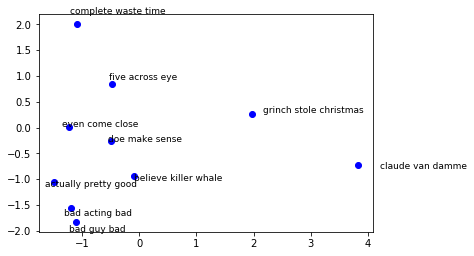

In [83]:
xx = pca[0].values
yy= pca[1].values

for i in range(10):
    plt.plot(xx[i], yy[i], 'bo')
    plt.text(xx[i] * (1 + 0.1), yy[i] * (1 + 0.1) ,c[i], fontsize = 9)

In [84]:
cc = list(data.columns)

In [85]:
tsne = TSNE(n_components= 2, metric = 'cosine' )

In [86]:
viz = tsne.fit_transform(px)

In [87]:
viz = pd.DataFrame(viz)

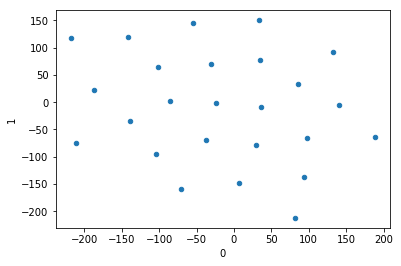

In [88]:
viz.plot(kind = 'scatter', x= 0, y = 1)

In [89]:
pca.index = c

# Clustering

In [90]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
cluster_assignments = kmeans.fit_predict(pca)
for cluster_assignment, word in zip(cluster_assignments, list(pca.index)):
    print(f"{word} assigned to cluster {cluster_assignment + 1}")

actually pretty good assigned to cluster 1
bad acting bad assigned to cluster 1
bad guy bad assigned to cluster 1
believe killer whale assigned to cluster 1
claude van damme assigned to cluster 2
complete waste time assigned to cluster 3
doe make sense assigned to cluster 1
even come close assigned to cluster 1
five across eye assigned to cluster 3
grinch stole christmas assigned to cluster 2
jean claude van assigned to cluster 2
jerry springer show assigned to cluster 2
local video store assigned to cluster 3
make look like assigned to cluster 1
natural born killer assigned to cluster 1
never get back assigned to cluster 1
new york city assigned to cluster 3
nightmare elm street assigned to cluster 3
one worst ever assigned to cluster 1
sci fi channel assigned to cluster 2
total waste time assigned to cluster 3
waste time money assigned to cluster 3
worst ever made assigned to cluster 1
worst ever seen assigned to cluster 1
year old boy assigned to cluster 1


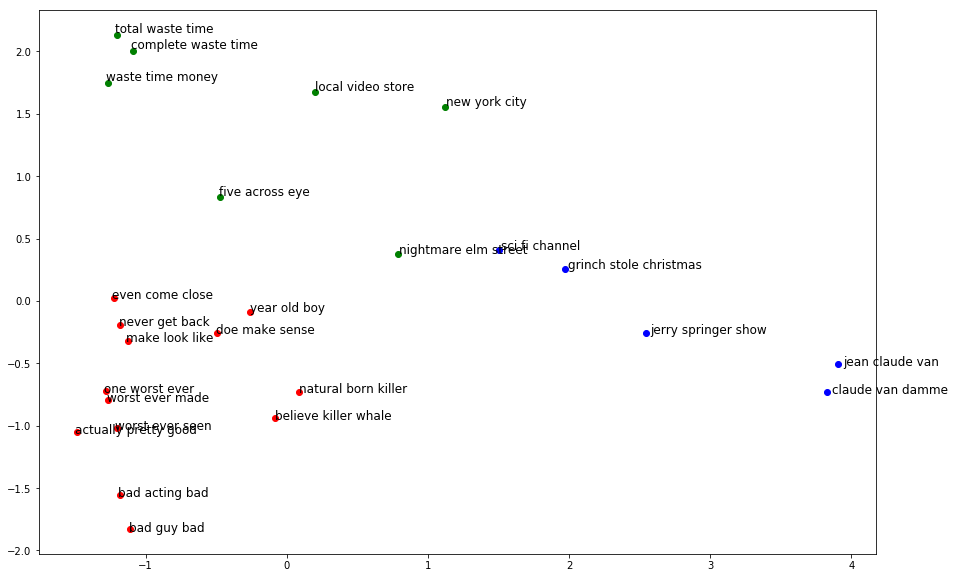

In [91]:
color_map = {
    0: "r",
    1: "b",
    2: "g",
    3: "y"
}

plt.rcParams["figure.figsize"] = (15,10)

for i, vector in enumerate(pca.index):
    x = pca.loc[vector][0]
    y = pca.loc[vector][1]
    plt.plot(x,y, 'bo', c=color_map[cluster_assignments[i]])
    plt.text(x * (1 + 0.01), y * (1 + 0.01) , c[i], fontsize=12)

# Deep Learning 

In [1]:
from importlib import reload
import sys
from imp import reload
import warnings
warnings.filterwarnings('ignore')
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

In [2]:
import pandas as pd

df1 = pd.read_csv('labeledTrainData.tsv', delimiter="\t")
df1 = df1.drop(['id'], axis=1)
df1.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [3]:
#df2 = pd.read_csv('imdb_master.csv',encoding="latin-1")
#df2.head()

In [4]:
#df2 = df2.drop(['Unnamed: 0','type','file'],axis=1)
#df2.columns = ["review","sentiment"]
#df2.head()

In [5]:
#df2 = df2[df2.sentiment != 'unsup']
#df2['sentiment'] = df2['sentiment'].map({'pos': 1, 'neg': 0})
#df2.head()

In [6]:
df = df1
df.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [7]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

df['Processed_Reviews'] = df.review.apply(lambda x: clean_text(x))

In [8]:
df.Processed_Reviews.apply(lambda x: len(x.split(" "))).mean()

129.54916

In [9]:
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

max_features = 6000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['Processed_Reviews'])
list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

maxlen = 50
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = df['sentiment']

embed_size = 128

model = Sequential()
model.add(Embedding(max_features, 200))
model.add(Bidirectional(LSTM(20, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(15, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_t,y, batch_size=512, epochs= 5, validation_split=0.2)

Using TensorFlow backend.


Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 28s 1ms/step - loss: 0.6721 - acc: 0.6403 - val_loss: 0.6086 - val_acc: 0.7930
Epoch 2/5
20000/20000 [==============================] - 25s 1ms/step - loss: 0.4924 - acc: 0.8028 - val_loss: 0.4121 - val_acc: 0.8238
Epoch 3/5
20000/20000 [==============================] - 24s 1ms/step - loss: 0.3636 - acc: 0.8579 - val_loss: 0.3766 - val_acc: 0.8400
Epoch 4/5
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2965 - acc: 0.8951 - val_loss: 0.3891 - val_acc: 0.8370
Epoch 5/5
20000/20000 [==============================] - 26s 1ms/step - loss: 0.2517 - acc: 0.9156 - val_loss: 0.4157 - val_acc: 0.8362


In [11]:
df_test=pd.read_csv("testData.tsv",header=0, delimiter="\t", quoting=3)
df_test.head()
df_test["review"]=df_test.review.apply(lambda x: clean_text(x))
df_test["sentiment"] = df_test["id"].map(lambda x: 1 if int(x.strip('"').split("_")[1]) >= 5 else 0)
y_test = df_test["sentiment"]
list_sentences_test = df_test["review"]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)
prediction = model.predict(X_te)
y_pred = (prediction > 0.5)
from sklearn.metrics import f1_score, confusion_matrix
print('F1-score: {0}'.format(f1_score(y_pred, y_test)))
print('Confusion matrix:')
confusion_matrix(y_pred, y_test)

F1-score: 0.8323615160349853
Confusion matrix:


array([[10582,  2222],
       [ 1918, 10278]], dtype=int64)

In [12]:
sum(confusion_matrix(y_pred, y_test))

array([12500, 12500], dtype=int64)